In [1]:
import pandas as pd
data=pd.read_csv('./stocks_info_final.csv',index_col=0)
data.head()

,total_reads,counts,deltatime,density,RxD
601318,1692091.0,399,31260.0,12.763916,2.159771e+07
725,1370011.0,400,25860.0,15.467904,2.119120e+07
300277,341398.0,401,9360.0,42.841880,1.462613e+07
651,950150.0,398,27120.0,14.675516,1.394394e+07
600093,916355.0,402,28800.0,13.958333,1.279079e+07


In [12]:
idx=data.index.tolist()
idx=list(map(str,idx))
idx=list(map(lambda x : x.zfill(6),idx))
print(idx[:20])
data.index=idx
print(data.head())

['601318', '000725', '300277', '000651', '600093', '300793', '300341', '600584', '600519', '002456', '601658', '600485', '300801', '002351', '002967', '002230', '002450', '603390', '601916', '002594']
        total_reads  counts  deltatime    density           RxD
601318    1692091.0     399    31260.0  12.763916  2.159771e+07
000725    1370011.0     400    25860.0  15.467904  2.119120e+07
300277     341398.0     401     9360.0  42.841880  1.462613e+07
000651     950150.0     398    27120.0  14.675516  1.394394e+07
600093     916355.0     402    28800.0  13.958333  1.279079e+07


In [3]:
import tushare as ts
ts.set_token(r'1271fb1250f168b75ba0b4cb017370dbb22885fa387936ac1a60dca3')
pro = ts.pro_api()

In [29]:
stock_list = pro.stock_basic(exchange='', list_status='L', fields='symbol,name,market')
stock_list.head()

,symbol,name,market
0,000001,平安银行,主板
1,000002,万科A,主板
2,000004,国农科技,主板
3,000005,世纪星源,主板
4,000006,深振业A,主板


In [46]:
#group=stock_list.groupby('market')
#lst=[ i for i in group]
#dct={}
#for i in lst:
#    dct[i[0]]=i[1].symbol.tolist()
#print(dct.keys())

stock_list.index=stock_list.symbol
print(stock_list.head())
print(stock_list.index)

symbol  name market
symbol                     
000001  000001  平安银行     主板
000002  000002   万科A     主板
000004  000004  国农科技     主板
000005  000005  世纪星源     主板
000006  000006  深振业A     主板
Index(['000001', '000002', '000004', '000005', '000006', '000007', '000008',
       '000009', '000010', '000011',
       ...
       '688333', '688357', '688358', '688363', '688366', '688368', '688369',
       '688388', '688389', '688399'],
      dtype='object', name='symbol', length=3739)


In [53]:
combined=data.join(stock_list)
combined=combined.drop_duplicates()
print(combined.head())

total_reads  counts  deltatime    density           RxD  symbol  name  \
601318    1692091.0     399    31260.0  12.763916  2.159771e+07  601318  中国平安   
000725    1370011.0     400    25860.0  15.467904  2.119120e+07  000725  京东方A   
300277     341398.0     401     9360.0  42.841880  1.462613e+07  300277   海联讯   
000651     950150.0     398    27120.0  14.675516  1.394394e+07  000651  格力电器   
600093     916355.0     402    28800.0  13.958333  1.279079e+07  600093  易见股份   

       market  
601318     主板  
000725     主板  
300277    创业板  
000651     主板  
600093     主板  


In [77]:
combined1=combined[['RxD','market']]
combined1.reset_index(inplace=True)

combined1.columns=['id','RxD','market']
print(combined1.head())
combined1=combined1[:15]


id           RxD market
0  601318  2.159771e+07     主板
1  000725  2.119120e+07     主板
2  300277  1.462613e+07    创业板
3  000651  1.394394e+07     主板
4  600093  1.279079e+07     主板


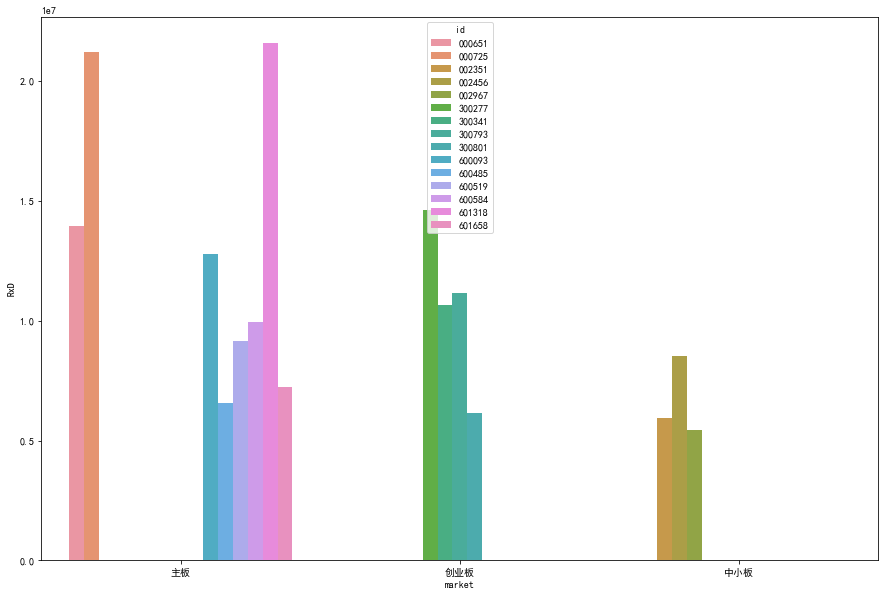

In [78]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示问题-设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.figure(figsize=(15, 10))
sns.barplot(x='market',y='RxD',hue='id',data=combined1)


